**Заголовок** :  Исследование данных интернет-магазина «Стримчик»\
\
**Описание проекта** : Доступны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В наборе данных имеется аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». Необходимо выяснить влияние каких закономерностей определяет успешность игры.\

**Цель исследования**: Выяснить какие закономерности влияют и определяют успешность игры, для, того, чтобы планировать рекламные кампании на потенциально популярные игры.

**Ход исследования**:

*  Подготовка данных: загрузка и изучение общей информации из предоставленного набора данных.
*  Предобработка данных: корректировка типа данных, создание дополнительных столбцов, обработка пропущенных значений и дубликатов в датафрейме.
* Исследовательский анализ данных: изучение основной информации об играх, платформах, продажах, визуализация зависимостей, изучение распределения игр.
* Составление портрета пользователя: определить популярные платформы, жанры среди пользователей, влияние рейтинга ESRB на пользователей.
* Проверка гипотез: 

    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action и Sports разные;
    - помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

**Общий вывод**: резюмирование полученных результатов,формулировка ключевых выводов и результатов

С помощью данного исследования данных интернет-магазина «Стримчик» я проверю некоторые гипотезы, которые смогут помочь в дальнейшем сделать выводы, как можно планировать рекламные кампании на популярные игры.

#### Шаг 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
from matplotlib import pyplot 
from statsmodels.graphics.gofplots import qqplot
import itertools

sns.set()

In [2]:
#загрузка данных из файла /datasets/games.csv
df_games = pd.read_csv('https://code.s3.yandex.net//datasets/games.csv')
df_games.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df_games.shape

(16715, 11)

In [4]:
#изучение общей информации
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#описание данных
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


***Вывод***\
В Шаге 1 я загрузила данные и изучела общую информацию: датафрэйм состоит из 16,5 тыс строк, довольно много пропущенных значений в Critic_Score, User_Score и Rating. User_Score имеет тип object, но по условиям проекта, должны быть числовые значения. Year_of_Release столбец имеет значения числового типа, потребуется преобрахование данных в тип дата

#### Шаг 2. Предобработка данных

Предобработка данных: корректировка типа данных, создание дополнительных столбцов, обработка пропущенных значений и дубликатов в датафрейме.


In [6]:
#привести к нижнему регистру названия столбцов
df_games = df_games.rename(columns=lambda x: x.lower())

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
 #смотрю кол-во пропусков в столбцах, сортирую по возрастанию
df_games.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [9]:
#кол-во пропусков в столбцах перевожу в %, сортирую по возрастанию
pd.DataFrame(round(df_games.isna().mean()*100,1).sort_values(ascending=False)) 

,0
critic_score,51.3
rating,40.5
user_score,40.1
year_of_release,1.6
name,0.0
platform,0.0
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0


In [10]:
round(df_games.corr()*100,1).style.background_gradient(cmap='coolwarm')

C:\Users\nadig\AppData\Local\Temp\ipykernel_5612\2384133064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df_games.corr()*100,1).style.background_gradient(cmap='coolwarm')


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,100.000000,-9.300000,0.400000,-16.800000,3.800000,1.100000
na_sales,-9.300000,100.000000,76.500000,45.000000,63.900000,24.100000
eu_sales,0.400000,76.500000,100.000000,43.500000,72.300000,22.100000
jp_sales,-16.800000,45.000000,43.500000,100.000000,29.100000,15.300000
other_sales,3.800000,63.900000,72.300000,29.100000,100.000000,19.900000
critic_score,1.100000,24.100000,22.100000,15.300000,19.900000,100.000000


In [11]:
#удаляю строки с пропусками
df_games = df_games.dropna(subset=['name'])
df_games = df_games.dropna(subset=['genre'])
df_games = df_games.dropna(subset=['year_of_release'])
df_columns_miss = df_games.isna().sum()
df_columns_miss[df_columns_miss != 0].sort_values(ascending=False)

critic_score    8461
rating          6676
user_score      6605
dtype: int64

In [12]:
#изучаю уникальные значения user_score
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
#изучаю значение 'tbd' в user_score
df_games[df_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


***Аббревиатура 'tbd' обозначает "to be determined", те "будет определено", те данные не известны на данный момент, поэтому следующим шагом я меняю тип данных в столбце 'user_score' на float64, добавляю аргумент errors='coerce', который все некорректные значения изменит на NaN***

In [14]:
#меняю тип данных в столбце 'user_score' на float64
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [15]:
#меняю пропуски в столбце "rating" на "unknown"
df_games['rating'] = df_games['rating'].fillna('unknown')

In [16]:
#проверка
pd.DataFrame(round(df_games.isna().mean()*100,1).sort_values(ascending=False)) 

,0
user_score,54.6
critic_score,51.5
name,0.0
platform,0.0
year_of_release,0.0
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0


In [17]:
#считаю суммарные продажи во всех регионах 
df_games['sales_total'] = 0
df_games['sales_total'] = df_games['na_sales'] + df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']

In [18]:
#считаю суммарные продажи во всех регионах 
#df_games['sales_total'] = 0
#df_games['sales_total'] = df_games[['na_sales','eu_sales','jp_sales','other_sales'].sum(axis=1)

In [19]:
#проверка
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sales_total      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [20]:
#проверяю столбец на явные дубликаты, выбираю игры с одинаковыми стоблцами: 'name', 'platform', 'year_of_release', удаляю дубликаты
duplicates = df_games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
duplicated_rows = df_games[duplicates]
display(duplicated_rows)
df_games = df_games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


***Вывод***\
В Шаге 2 я привела названия столбцов к нижнему регистру.\
Изменила тип данных в столбце 'user_score' на float64, тк 'user_score' -  оценка пользователей, числовое значение, по которым дальше будет участвовать в анализе данных.\
Удалила пропуски в столбцах "year_of_release", "name", "genre", тк кол-во строк - меньше 2% от общего объема, не влияет на результат.\
Изменяю пропуски в столбце "rating" на "unknown", тк "rating" типа "object", в расчетах значения использоваться не будут.\
Пропуски 'user_score' и 'critic_score' оставила, тк пропущено большое кол-во значений (больше 20%). Замена  пропусков может привести к некорректным расчетам.\
Значения 'tbd' в столбце 'user_score' изменлат на NaN, тк аббревиатура 'tbd' обозначает "to be determined", те "будет определено", те данные не известны на данный момент\
Проверила данные на явные дубликаты и удалила дубликаты\
Пропуски "critic_score", "user_score" могут возникнут, если игра еще новая и ее не успели оценить

#### Шаг 3. Исследовательский анализ данных

##### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
#считаю кол-во проданных млн копий игр по годам
df_copy_sales = df_games.groupby('year_of_release').agg({'na_sales': ['sum'], 
                                        'eu_sales': ['sum'],
                                        'jp_sales': ['sum'], 
                                        'other_sales': ['sum'], 
                                        'sales_total': ['sum']}). sort_values(by = [('sales_total', 'sum')]).reset_index()
df_copy_sales

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,sales_total
,,sum,sum,sum,sum,sum
0,1980.0,10.59,0.67,0.00,0.12,11.38
1,1983.0,7.76,0.80,8.10,0.14,16.80
2,1987.0,8.46,1.41,11.63,0.20,21.70
3,1982.0,26.92,1.65,0.00,0.31,28.88
4,1991.0,12.76,3.95,14.78,0.74,32.23
5,1981.0,33.40,1.96,0.00,0.32,35.68
6,1986.0,12.50,2.84,19.81,1.93,37.08
7,1993.0,15.12,4.65,25.33,0.89,45.99
8,1988.0,23.87,6.59,15.76,0.99,47.21


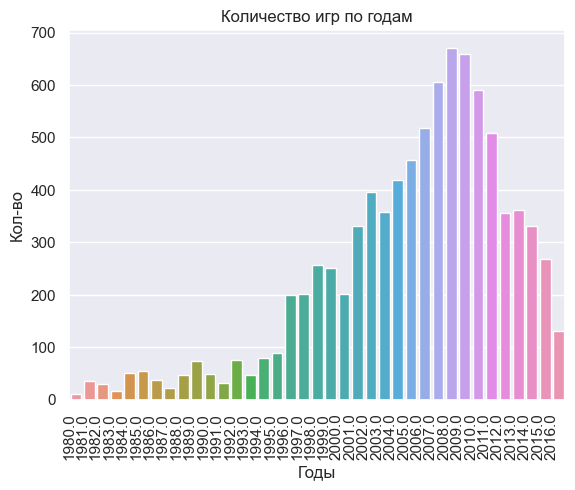

In [22]:
#строю график распределения кол-во проданных млн копий игр по годам
df_copy_sales_graph = df_games.groupby('year_of_release')['sales_total'].sum().sort_values().to_frame().reset_index()
sns.barplot(x='year_of_release', y='sales_total', data=df_copy_sales_graph).set(title='Количество игр по годам')
pyplot.xlabel("Годы")
pyplot.ylabel("Кол-во")
pyplot.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light' 
);
#pyplot.figure(figsize=(5, 1))

***Вывод*** минимальное количество копий игр было выпущено с 1980 до 1995 года (от 11 до 88 млн копий в год), данные этого периода можно не учитавать при анализе данных для планирования рекламные кампаний на популярные игры в 2017 году.

#####  Как менялись продажи по платформам.

In [23]:
#создаю датафрейм с пятью платформами лидирующими в продажах игр
df_platform_sales = df_games.groupby('platform')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index().head(5)
display(df_platform_sales)
plat = df_platform_sales['platform'].unique()
print(plat)

,platform,sales_total
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78


['PS2' 'X360' 'PS3' 'Wii' 'DS']


    year_of_release  sales_total
0            2004.0       211.81
1            2002.0       205.38
2            2003.0       184.31
3            2001.0       166.43
4            2005.0       160.66
5            2006.0       103.42
6            2007.0        75.99
7            2008.0        53.90
8            2000.0        39.17
9            2009.0        26.40
10           2010.0         5.64
11           2011.0         0.45


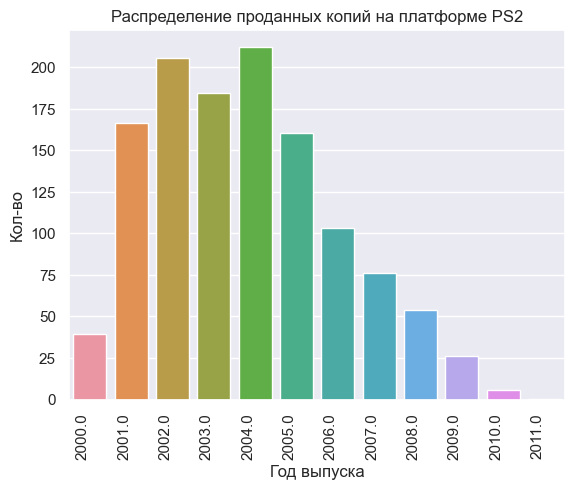

    year_of_release  sales_total
0            2010.0       170.03
1            2011.0       143.84
2            2008.0       135.26
3            2009.0       120.29
4            2012.0        99.74
5            2007.0        95.41
6            2013.0        88.58
7            2006.0        51.62
8            2014.0        34.74
9            2015.0        11.96
10           2005.0         8.25
11           2016.0         1.52


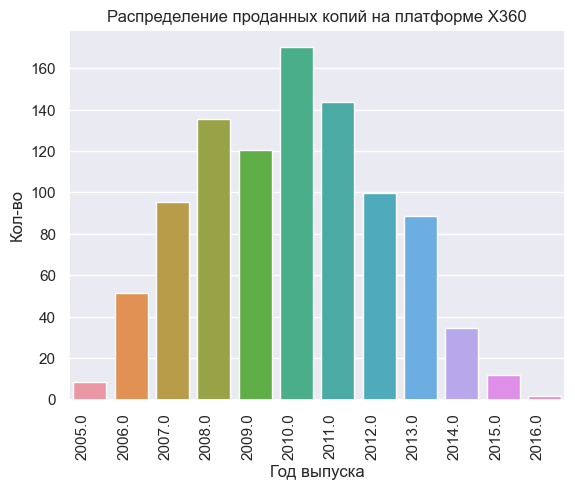

    year_of_release  sales_total
0            2011.0       156.78
1            2010.0       142.17
2            2009.0       130.93
3            2008.0       118.52
4            2013.0       113.25
5            2012.0       107.35
6            2007.0        73.19
7            2014.0        47.76
8            2006.0        20.96
9            2015.0        16.82
10           2016.0         3.60


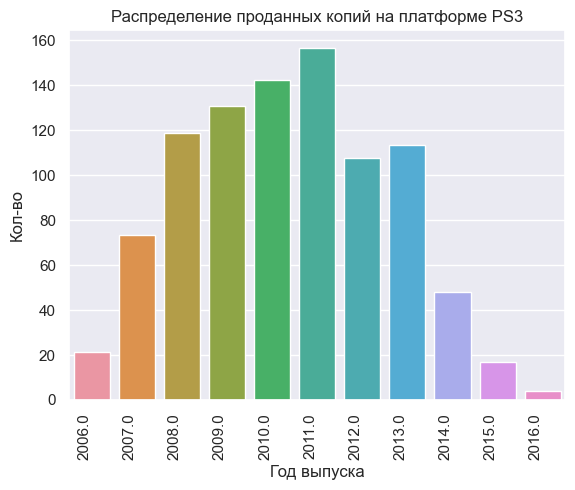

    year_of_release  sales_total
0            2009.0       206.97
1            2008.0       171.32
2            2007.0       152.77
3            2006.0       137.15
4            2010.0       127.95
5            2011.0        59.65
6            2012.0        21.71
7            2013.0         8.59
8            2014.0         3.75
9            2015.0         1.14
10           2016.0         0.18


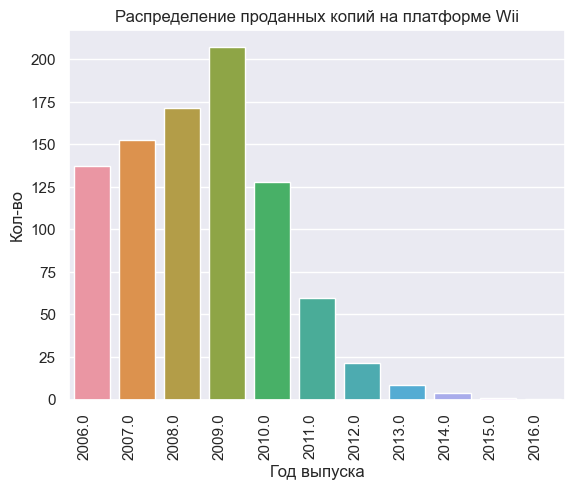

    year_of_release  sales_total
0            2007.0       146.94
1            2008.0       145.31
2            2005.0       130.14
3            2006.0       119.81
4            2009.0       119.54
5            2010.0        85.02
6            2011.0        26.18
7            2004.0        17.27
8            2012.0        11.01
9            2013.0         1.54
10           1985.0         0.02


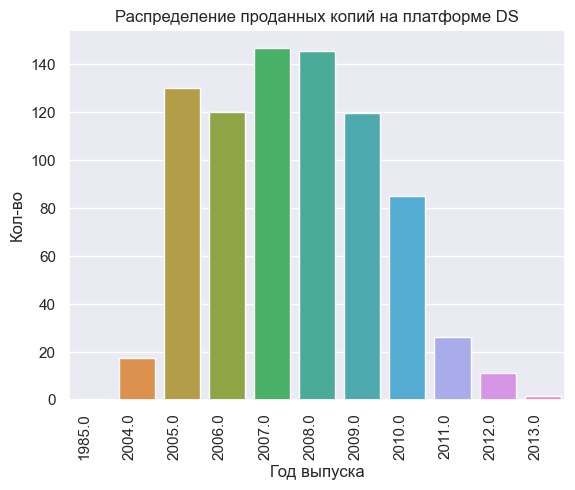

In [24]:
#строю графики распределения проданных копий на лидирующий платформах
for i in plat:
    df = df_games[df_games['platform'] == i]
    df = df.groupby('year_of_release')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index()
    print(df)
    sns.barplot(x='year_of_release', y='sales_total', data=df).set(title=f'Распределение проданных копий на платформе {i}')
    pyplot.xlabel("Год выпуска")
    pyplot.ylabel("Кол-во")
    pyplot.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light');
    pyplot.show()


***Вывод*** за 5-6 лет появляются новые и исчезают старые платформы

##### Создать датафрейм с данными за актуальный период

***Актуальный период*** за 5-6 лет появляются новые и исчезают старые платформы, больше 100 млн копий игр в год начали выпускать после 1995 года. Платформы с максимальными продажами стартуют с 2001 года. Актуальный период для прогноза обычно 3-4 года, для составления прогноза на 2017 год выбираю - **с 2014 по 2016 годы**

In [25]:
#создаю датафрейм с данными за актуальный период
df_games_2014_2016 = df_games[df_games['year_of_release']>2013] 
df_games_2014_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [26]:
#смотрю сколько платформ в актуальном периоде
df_games_2014_2016['platform'].nunique()

10

In [27]:
#смотрю какие платформы актуально периода лидируют в продажах игр, выделяю первую пятерку
df_platform_sales_2014_2016 = df_games_2014_2016.groupby(['platform'])['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index().head(5)
display(df_platform_sales_2014_2016)
plat1 = df_platform_sales_2014_2016['platform'].unique()
print(plat1)

,platform,sales_total
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


['PS4' 'XOne' '3DS' 'PS3' 'X360']


   year_of_release  sales_total
0           2015.0       118.90
1           2014.0       100.00
2           2016.0        69.25


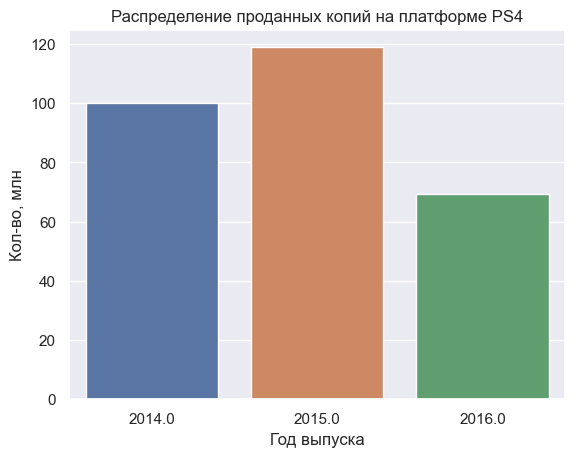

   year_of_release  sales_total
0           2015.0        60.14
1           2014.0        54.07
2           2016.0        26.15


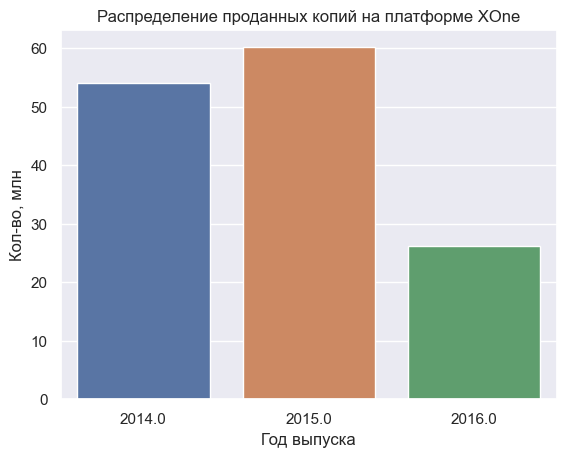

   year_of_release  sales_total
0           2014.0        43.76
1           2015.0        27.78
2           2016.0        15.14


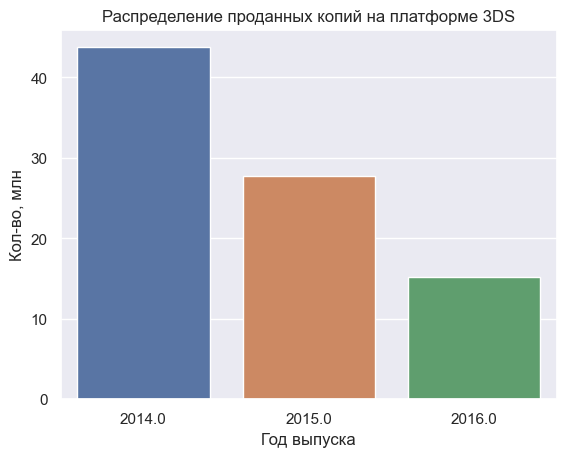

   year_of_release  sales_total
0           2014.0        47.76
1           2015.0        16.82
2           2016.0         3.60


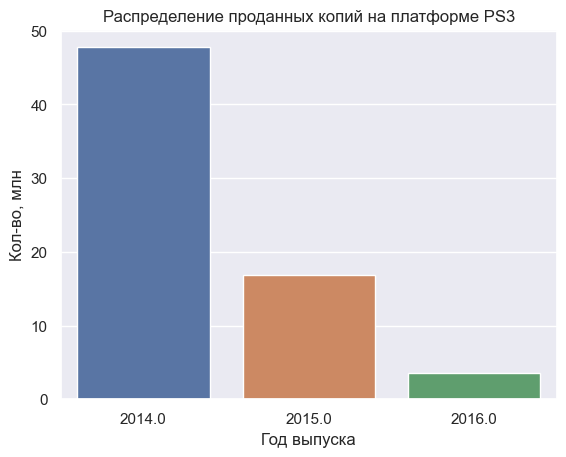

   year_of_release  sales_total
0           2014.0        34.74
1           2015.0        11.96
2           2016.0         1.52


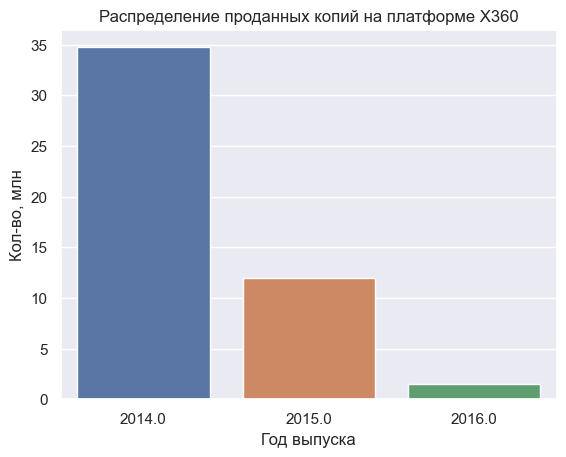

In [28]:
#строю графики распределения проданных копий по годам на лидирующих платформах
plat1 = df_platform_sales_2014_2016['platform'].unique()
for i in plat1:
    df = df_games_2014_2016[df_games_2014_2016['platform'] == i]
    df = df.groupby('year_of_release')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index()
    print(df)
    sns.barplot(x='year_of_release', y='sales_total', data=df).set(title=f'Распределение проданных копий на платформе {i}')
    pyplot.xlabel("Год выпуска")
    pyplot.ylabel("Кол-во, млн")
    pyplot.show()


<Axes: xlabel='year_of_release'>

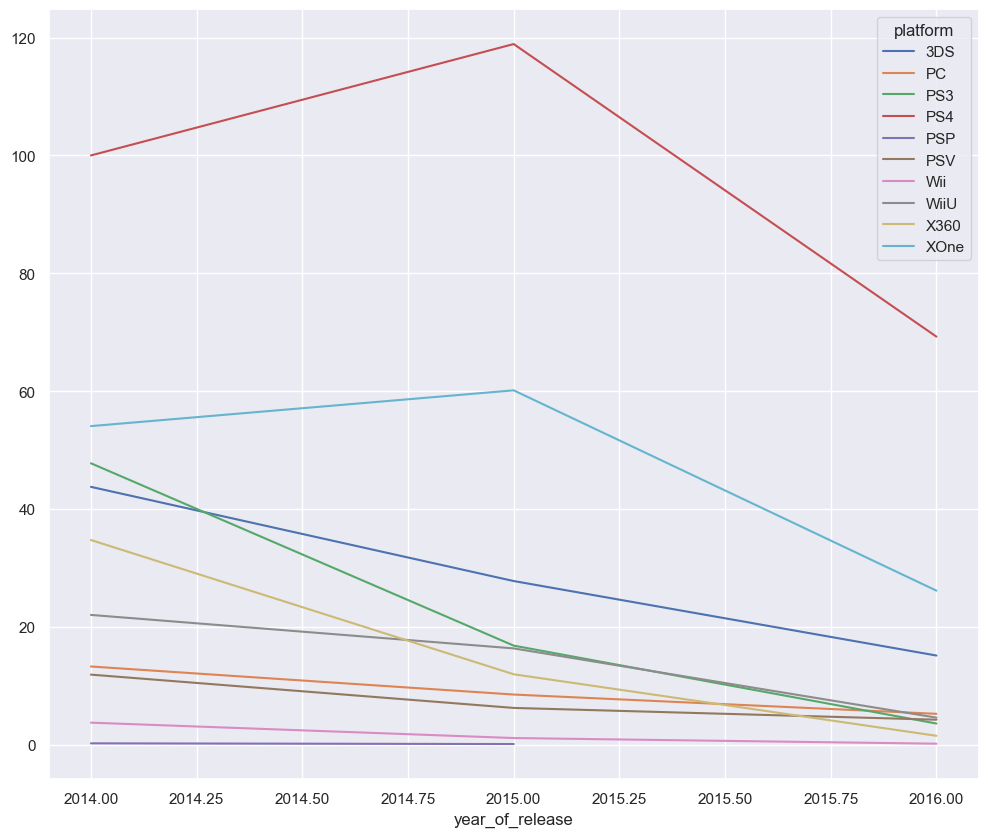

In [29]:
df_games_2014_2016.pivot_table(index=['year_of_release'], columns='platform', values = 'sales_total', aggfunc = 'sum').plot(figsize=(12,10))

#строю графики распределения проданных копий по годам на лидирующих платформах
#plat1 = df_platform_sales_2014_2016['platform'].unique()
for i in plat1:
    pyplot.plot(df_games_2014_2016['year_of_release'],df_games_2014_2016['sales_total'])

***Вывод:*** Я выделила 6 платформ, лидирующих по продажам за 2014-2016 гг. : **'PS4' 'XOne' '3DS' 'PS3' 'X360' 'WiiU'**
Из графиков распределения проданных копий на платформе 

##### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам

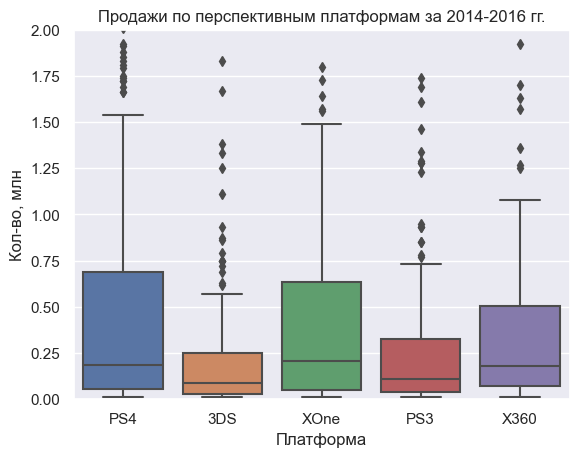

In [30]:
sns.boxplot(x='platform', y='sales_total', data=df_games_2014_2016[df_games_2014_2016['platform'].isin(plat1)])
pyplot.xlabel('Платформа')
pyplot.ylabel('Кол-во, млн')
pyplot.title('Продажи по перспективным платформам за 2014-2016 гг.')
pyplot.suptitle('')
pyplot.ylim(0, 2)
pyplot.show()

***Вывод:*** по графику "ящик с усами" можно сделать вывод, что основыное количество проданных копий находится на популярных платформах ('PS4' 'XOne' 'WiiU' 'X360' 'Wii' 'PS3') имеют разброс от 100 до 750 тыс.копий, продажи на платформах больше 1,5 млн копий - редкость 

##### Посмотреть как влияют на продажи  отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами внутри одной платформы

In [31]:
#создаю датасет с самой популярной платформой 2014-2016 гг. - 'PS4'
df_games_PS4 = df_games_2014_2016[df_games_2014_2016['platform'] == 'PS4']
df_games_PS4.sort_values('sales_total')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16585,Farming 2017 - The Simulation,PS4,2016.0,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
15734,Prototype: Biohazard Bundle,PS4,2016.0,Action,0.01,0.00,0.00,0.00,48.0,2.0,M,0.01
15762,Rabbids Invasion: The Interactive TV Show,PS4,2014.0,Misc,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
15790,This War of Mine,PS4,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
15839,Mark McMorris Infinite Air,PS4,2016.0,Sports,0.01,0.00,0.00,0.00,49.0,6.0,T,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Text(0.5, 1.0, 'Влияние оценки критиков на продажи на платформе PS4')

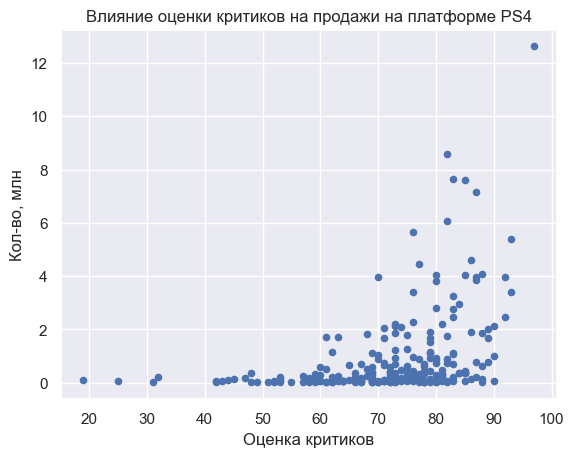

In [32]:
#строю диаграмму рассеяния влияния оценки критиков на продажи на платформе 'PS4'
df_games_PS4.sort_values('critic_score').plot(x='critic_score', y='sales_total', kind='scatter', grid=True)
pyplot.xlabel('Оценка критиков')
pyplot.ylabel('Кол-во, млн')
pyplot.title('Влияние оценки критиков на продажи на платформе PS4')

Text(0.5, 1.0, 'Влияние оценки пользователей на продажи на платформе PS4')

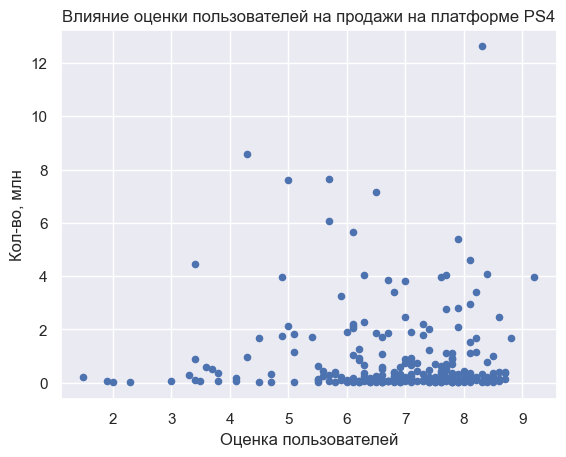

In [33]:
#строю диаграмму рассеяния влияния оценки пользователей на продажи на платформе 'PS4'
df_games_PS4.sort_values('user_score').plot(x='user_score', y='sales_total', kind='scatter', grid=True)
pyplot.xlabel('Оценка пользователей')
pyplot.ylabel('Кол-во, млн')
pyplot.title('Влияние оценки пользователей на продажи на платформе PS4')

In [34]:
#считаю коэффициент корреляции Пирсона между отзывами и продажами датасета df_games_PS4
round(df_games_PS4[['critic_score','user_score','sales_total']].corr()*100,1).style.background_gradient(cmap='coolwarm') 

,critic_score,user_score,sales_total
critic_score,100.000000,54.600000,40.300000
user_score,54.600000,100.000000,-4.000000
sales_total,40.300000,-4.000000,100.000000


***Вывод:*** я построила диаграммы рассеяния влияния оценки критиков и оценки пользователей на продажи на платформе 'PS4'.\
Коэффициент корреляции Пирсона между отзывами критиков положительный и имеет большое значение, можно сделать вывод, что оценка критиков имеет сильное влияние на продажи. Коэффициент корреляции Пирсона между отзывами пользователей и продажами имеет отрицательное значение, значит отлицательное влияние на продажи. При этом на диаграммах рассеяния видно, что есть выброс с максимальным количеством проданных копий и высокими оценками критиков и пользователей.\
Можно предположить, что чем выше оценки критиков на других платоформах, тем лучше будут продажи

##### Посмотреть общее распределение игр по жанрам. Определить жанры с высокими и низкими продажами

In [35]:
#группирую датасет по жанрам
df_genre = df_games_2014_2016.groupby('genre')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index()
display(df_genre)

,genre,sales_total
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


***Вывод:*** Лидирующие по суммарным продажам жанры: Action, Shooter, Sports. Меньше всего продаж у игры с жанром Puzzle

In [36]:
#группирую датасет по жанрам
df_genre1 = df_games_2014_2016.groupby('genre')['sales_total'].median().sort_values(ascending=False).to_frame().reset_index()
display(df_genre1)

,genre,sales_total
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


***Вывод:*** Лидирующие по медианным продажам жанры: Action, Shooter, Sports, Platform, Fighting, Role-Playing. Меньше всего продаж у игры с жанром Adventure и Puzzle

#### Шаг 4. Составление портрета пользователя

Составление портрета пользователя: определить популярные платформы, жанры среди пользователей, влияние рейтинга ESRB на пользователей.

##### Составляю портрет пользователя для Северной Америки (NA_sales)

###### Определяю самые популярные платформы (топ-5) для Северной Америки

In [37]:
#фильтрую датасет по пользователям в Северной Америке (NA)
df_users_na = df_games_2014_2016[df_games_2014_2016['na_sales'] > 0]
display(df_users_na)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01
16553,Farming Simulator 2014,PSV,2014.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
16618,Xblaze: Lost Memories,PSV,2015.0,Adventure,0.01,0.00,0.00,0.00,NaN,7.0,M,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknown,0.01


In [38]:
#группирую датасет с пользователями Северной Америки (NA) по платформам и продажам, определяю пятерку самых популярных платформ
df_users_na_pltfrm = df_users_na.groupby('platform')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index()
df_users_na_pltfrm

,platform,sales_total
0,PS4,281.49
1,XOne,140.04
2,3DS,67.13
3,PS3,61.17
4,X360,48.02
5,WiiU,42.35
6,PC,22.22
7,PSV,10.76
8,Wii,4.98


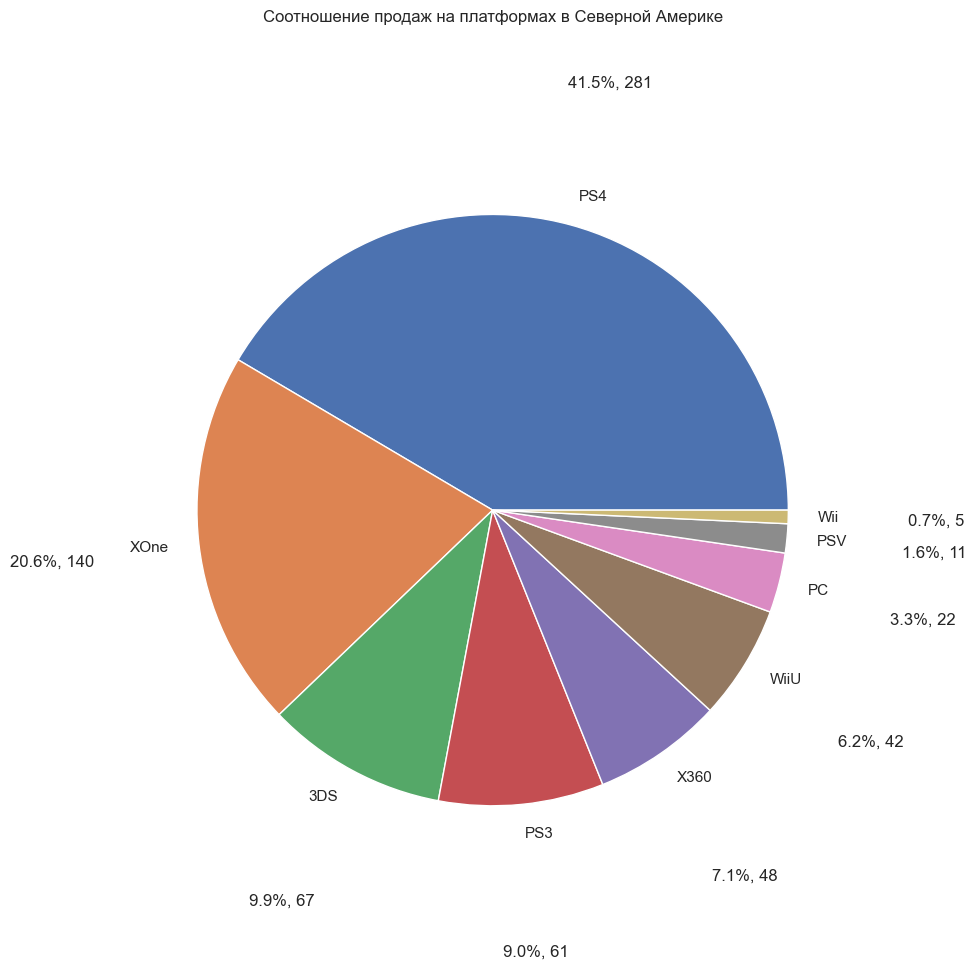

In [39]:
# строю круговую диаграмму продаж на платформах в Северной Америке
labels1 = df_users_na_pltfrm['platform']
sizes1 = df_users_na_pltfrm['sales_total']
fig1, ax1 = pyplot.subplots()
ax1.pie(sizes1, labels=labels1, autopct=lambda p:f'{p:.1f}%, {p*sum(sizes1)/100 :.0f}',pctdistance=1.5, radius=2)
pyplot.title('Cоотношение продаж на платформах в Северной Америке', x= 0.5 , y= 1.8)
pyplot.show()

***Вывод:*** Платформа PS4 лидирует по продажам в Северной Америке, продает больше 40% игр. Также в пятерку платформ с лучшими продажами вошли XOne - 20,6%, 3DS - 9,9%, PS3 - 9%, X360 - 7,1%, что составляет 46,6% всего рынка продаж 

###### Определяю самые популярные жанры (топ-5) для Северной Америки

In [40]:
#группирую датасет с пользователями Северной Америки (NA) по жанрам и продажам, определяю пятерку самых популярных жанров
df_users_na_genre = df_users_na.groupby('genre')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index().head(5)
df_users_na_genre

,genre,sales_total
0,Action,178.57
1,Shooter,170.32
2,Sports,106.18
3,Role-Playing,89.07
4,Misc,34.23


***Вывод:*** В пятерку самых популярных жанров игр входят экшен, шутеры, спорт, ролевые игры и стратегии

###### Определяю влияет ли рейтинг ESRB на продажи в  Северной Америки

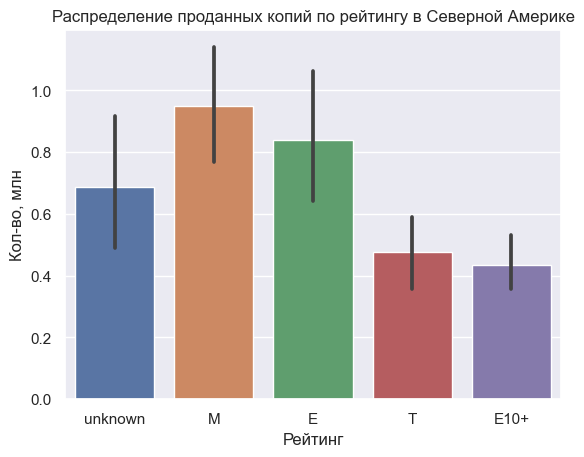

In [41]:
#строю графики распределения проданных копий по годам на лидирующих платформах
sns.barplot(x='rating', y='sales_total', data=df_users_na).set(title=f'Распределение проданных копий по рейтингу в Северной Америке')
pyplot.xlabel("Рейтинг")
pyplot.ylabel("Кол-во, млн")
pyplot.show()

***Вывод:*** Игры с рейтингами М и Е в Северной Америке продаются лучше всего

##### Составляю портрет пользователя для Европы (EU_sales)

###### Определяю самые популярные платформы (топ-5) для Европы

In [42]:
#фильтрую датасет по пользователям для Европы (EU_sales)
df_users_eu = df_games_2014_2016[df_games_2014_2016['eu_sales'] > 0]
display(df_users_eu)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


In [43]:
#группирую датасет с пользователями Европы (EU) по платформам и продажам, определяю пятерку самых популярных платформ
df_users_eu_pltfrm = df_users_eu.groupby('platform')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index()
df_users_eu_pltfrm

,platform,sales_total
0,PS4,280.42
1,XOne,139.70
2,3DS,64.21
3,PS3,60.53
4,X360,47.50
5,WiiU,42.21
6,PC,27.02
7,PSV,11.76
8,Wii,5.07


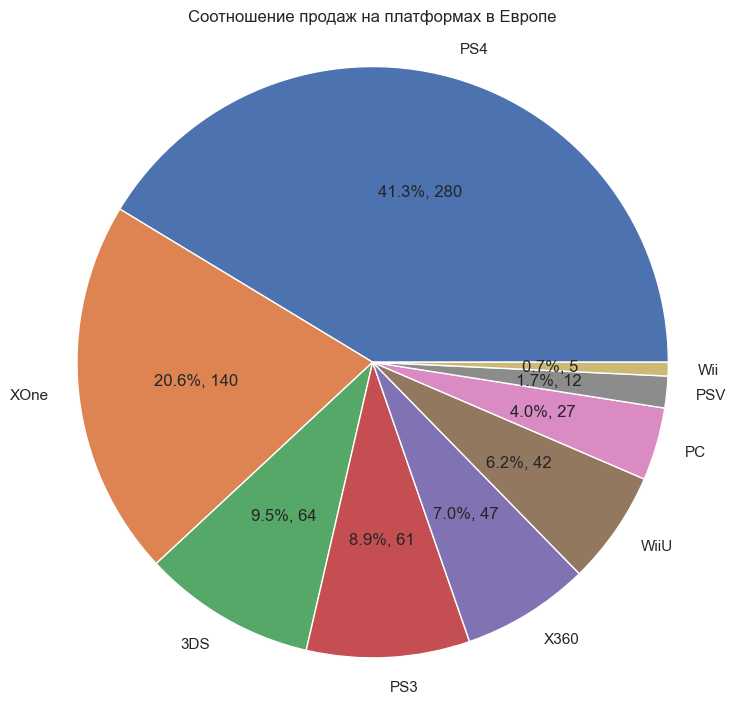

In [44]:
# строю круговую диаграмму продаж на платформах в Европе
labels2 = df_users_eu_pltfrm['platform']
sizes2 = df_users_eu_pltfrm['sales_total']
fig2, ax2 = pyplot.subplots()
ax2.pie(sizes2, labels=labels2, autopct=lambda p:f'{p:.1f}%, {p*sum(sizes2)/100 :.0f}', radius=2)
pyplot.title('Cоотношение продаж на платформах в Европе', x= 0.5 , y= 1.4)
pyplot.show()

***Вывод:*** Платформа PS4 лидирует по продажам в Европе, продает больше 40% игр. Также в пятерку платформ с лучшими продажами вошли XOne - 20,6%, 3DS - 9,5%, PS3 - 8,9%, X360 - 7,0%, что составляет 46% всего рынка продаж 

###### Определяю самые популярные жанры (топ-5) для Европы

In [45]:
#группирую датасет с пользователями Европы по жанрам и продажам, определяю пятерку самых популярных жанров
df_users_eu_genre = df_users_eu.groupby('genre')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index().head(5)
df_users_eu_genre

,genre,sales_total
0,Action,178.92
1,Shooter,170.58
2,Sports,106.22
3,Role-Playing,86.09
4,Misc,34.93


***Вывод:*** В пятерку самых популярных жанров игр входят экшен, шутеры, спорт, ролевые игры и стратегии

###### Определяю влияет ли рейтинг ESRB на продажи в  Европе

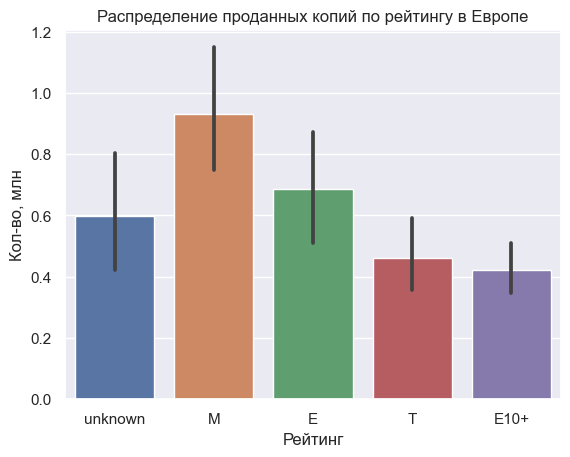

In [46]:
#строю графики распределения проданных копий по годам на лидирующих платформах
sns.barplot(x='rating', y='sales_total', data=df_users_eu).set(title=f'Распределение проданных копий по рейтингу в Европе')
pyplot.xlabel("Рейтинг")
pyplot.ylabel("Кол-во, млн")
pyplot.show()

***Вывод:*** Игры с рейтингами М и Е в Европе продаются лучше всего

##### Составляю портрет пользователя для Японии (JP_sales)

###### Определяю самые популярные платформы (топ-5) для Японии

In [47]:
#фильтрую датасет по пользователям для Японии (JP_sales)
df_users_jp = df_games_2014_2016[df_games_2014_2016['jp_sales'] > 0]
display(df_users_jp)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [48]:
#группирую датасет с пользователями для Японии (JP) по платформам и продажам, определяю пятерку самых популярных платформ
df_users_jp_pltfrm = df_users_jp.groupby('platform')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index()
df_users_jp_pltfrm

,platform,sales_total
0,PS4,242.12
1,3DS,82.65
2,PS3,46.10
3,XOne,44.09
4,WiiU,36.14
5,PSV,20.25
6,X360,5.13
7,PSP,0.36


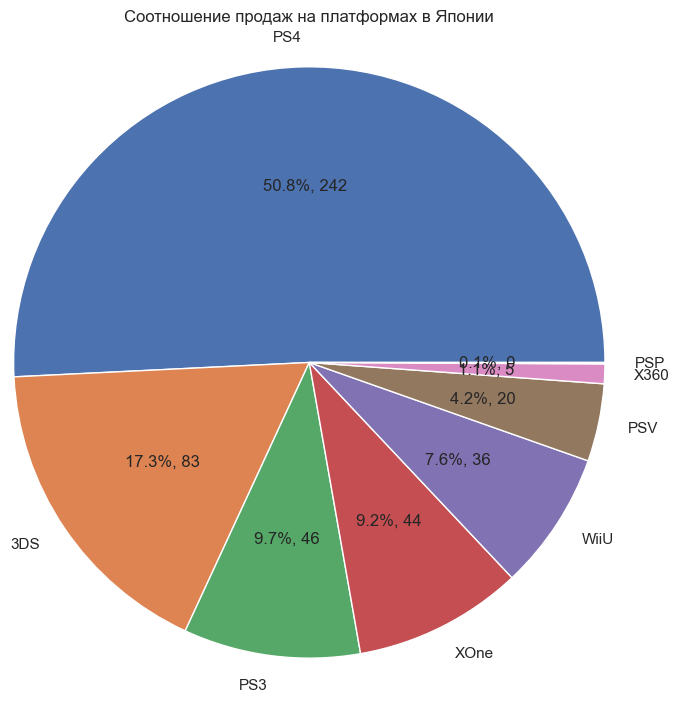

In [49]:
# строю круговую диаграмму продаж на платформах в Японии
labels3 = df_users_jp_pltfrm['platform']
sizes3 = df_users_jp_pltfrm['sales_total']
fig1, ax1 = pyplot.subplots()
ax1.pie(sizes3, labels=labels3, autopct=lambda p:f'{p:.1f}%, {p*sum(sizes3)/100 :.0f}', radius=2)
pyplot.title('Cоотношение продаж на платформах в Японии', x= 0.5 , y= 1.4)
pyplot.show()

***Вывод:*** Платформа PS4 лидирует по продажам в Японии, продает больше 50% игр. Также в пятерку платформ с лучшими продажами вошли 3DS - 17,3%, PS3 - 9,7%, XOne - 9,2%, WiiU - 7,6%, что составляет 43,8% всего рынка продаж 

###### Определяю самые популярные жанры (топ-5) для Японии

In [50]:
#группирую датасет с пользователями Японии по жанрам и продажам, определяю пятерку самых популярных жанров
df_users_jp_genre = df_users_jp.groupby('genre')['sales_total'].sum().sort_values(ascending=False).to_frame().reset_index().head(5)
df_users_jp_genre

,genre,sales_total
0,Action,127.77
1,Shooter,124.94
2,Role-Playing,84.30
3,Sports,49.42
4,Fighting,22.16


***Вывод***: В пятерку самых популярных жанров игр входят экшен, шутеры, спорт, ролевые игры и борьба

###### Определяю влияет ли рейтинг ESRB на продажи в  Японии

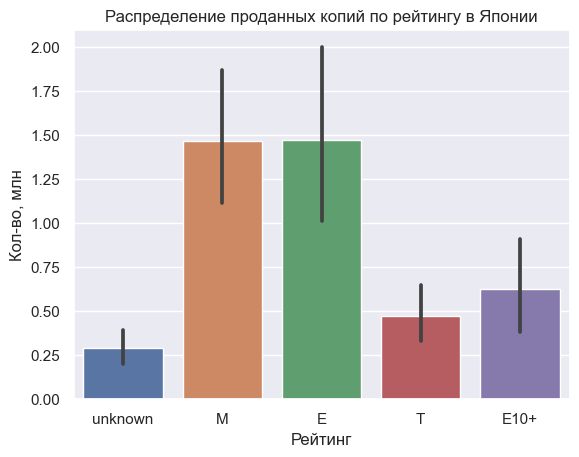

In [51]:
#строю графики распределения проданных копий по годам на лидирующих платформах
sns.barplot(x='rating', y='sales_total', data=df_users_jp).set(title=f'Распределение проданных копий по рейтингу в Японии')
pyplot.xlabel("Рейтинг")
pyplot.ylabel("Кол-во, млн")
pyplot.show()

***Вывод:*** Игры с рейтингами М и Е в Японии продаются лучше всего, рейтинг Т меньше всего популярен в Японии

***Общий вывод при составлении портрета пользователей:***

1. В Северной Америке и Европе по продажам лидирует платформа PS4, эта платформа продает больше 40% игр всего региона.
2. Также в пятерку платформ с лучшими продажами вошли в Северной Америке и Европе вошли XOne, 3DS, PS3, X360. Эти платформы  занимают больше 40% всего рынка продаж.
3. Также мы знаем, что PS4 и PS3 - производитель Playstation (Sony, Япония), рынок продаж Playstation в Северной Америке и Европе чуть больше 50%.
4. XOne, X360 - производитель Xbox (Microsoft, Америка), рынок продаж Xbox в Северной Америке и Европе чуть больше 27%.
5. 3DS - производитель Nintendo (Япония), рынок продаж Nintendo в Северной Америке и Европе около 10%.
6. В Северной Америке и Европе Японские производители игр занимаю около 60% от продаж всех игр в регионах, Американские производители игр - около 30% рынка
7. В Японии чуть больше 60% рынка занимает Playstation (Sony, Япония), PS4 - 50,8%, PS3 - 9,7%.
8. 3DS и Wii U - производитель Nintendo (Япония) в Японии занимает около 25% рынка игр.
9. XOne, X360 - производитель Xbox (Microsoft, Америка) в Японии занимают около 10% рынка продажи игр.
10. В Японии Японские производители игр занимаю около 85% от продаж всех игр в регионах, Американские производители игр - около 10% рынка
11. Рейтинг ESRB -  возрастной рейтинг игр, в Северной Америке и Европе преобладают игры с категориями М и Е, которые подходят для лиц старше 17 лет и всех возрастных категорий.
12. В Японии также преобладают игры с категориями М и Е, меньшей популярностью пользуются игры с возрастной категорией - для лиц старше 13 лет, но большую популярность имеют игры с категорией Е+ - для лиц старше 10 лет. Можно предположить, что в Японии жители начинают играть в компьютерные игры с более раннего возраста.

#### Шаг 5. Проверка гипотез

##### Проверить гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Ho = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые\
H1 = Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [52]:
df_games_2014_2016.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


In [53]:
#нулевая гипотеза = средние пользовательские рейтинги платформ Xbox One и PC одинаковые
xone = df_games_2014_2016[(df_games_2014_2016['platform'] == 'XOne')&(~df_games_2014_2016['user_score'].isna() )]['user_score']
pc = df_games_2014_2016[(df_games_2014_2016['platform'] == 'PC')&(~df_games_2014_2016['user_score'].isna() )]['user_score']
alpha = 0.05 #принимаю alpha = 5%
results = stats.ttest_ind(xone,pc)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print('pvalue =', results.pvalue)
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    print('pvalue =', results.pvalue)
print('Средний пользовательский рейтинг платформы Xbox One -', round(xone.mean(),3))
print('Средний пользовательский рейтинг платформы PC -', round(pc.mean(),3))

Не удалось отвергнуть нулевую гипотезу
pvalue = 0.10450507919348415
Средний пользовательский рейтинг платформы Xbox One - 6.595
Средний пользовательский рейтинг платформы PC - 6.298


***Вывод***: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

##### Проверить гипотезу:  Средние пользовательские рейтинги жанров Action и Sports разные
Ho = Средние пользовательские рейтинги жанров Action и Sports одинаковые\
H1 = Средние пользовательские рейтинги жанров Action и Sports разные.

In [54]:
#нулевая гипотеза = средние пользовательские рейтинги жанров Action и Sports одинаковые
action = df_games_2014_2016[(df_games_2014_2016['genre'] == 'Action')&(~df_games_2014_2016['user_score'].isna() )]['user_score']
sports = df_games_2014_2016[(df_games_2014_2016['genre'] == 'Sports')&(~df_games_2014_2016['user_score'].isna() )]['user_score']
alpha = 0.05 #принимаю alpha = 5%
results = stats.ttest_ind(action,sports)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print('pvalue =', results.pvalue)
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    print('pvalue =', results.pvalue)
print('Средний пользовательский рейтинг жанра Action -', round(action.mean(),3))
print('Средний пользовательский рейтинг жанра Sports -', round(sports.mean(),3))

Отвергаем нулевую гипотезу
pvalue = 2.8711147985105864e-19
Средний пользовательский рейтинг жанра Action - 6.761
Средний пользовательский рейтинг жанра Sports - 5.225


***Вывод:*** Средние пользовательские рейтинги жанров Action и Sports разные

**Как вы сформулировали нулевую и альтернативную гипотезы?**
Нулевые гипотезы исходят из равенства условий, поэтому я выбираю формулировку, что средние пользовательские рейтинги платформ и жанров - одинаковые, а альтернативная гипотеза - обратное условие, т.е средние пользовательские рейтинги разные. По условию проекта нам не требуется определять больше или меньше рейтинги, поэтому я проверяю двухсторонние гипотезы

***Какой критерий применили для проверки гипотез и почему?***\
Тк по условию задачи, необходимо проверить средние пользовательские рейтинги, то для спроверки гипотез я использую данные из столбца 'user_score' - оценка пользователей

#### Общий вывод по проекту: Исследование данных интернет-магазина «Стримчик»

<div style="border:solid Yellow 3px; padding: 20px">
    
Для изучения данных была предоставления информация о 16 тыс. продажах игр в интернет-магазине «Стримчик»

Перед выполнением исследовательского анализа данных и проверке гипотез, я провела предобработку данных, в т.ч. привела названия столбцов к нижнему регистру. Изменила тип данных в столбце 'user_score' на float64. Удалила пропуски в столбцах "year_of_release", "name", "genre". Изменила пропуски в столбце "rating" на "unknown". Пропуски 'user_score' и 'critic_score' оставила, тк пропущено большое кол-во значений (больше 20%). Значения 'tbd' в столбце 'user_score' изменлат на NaN. Проверила данные на явные дубликаты и удалила дубликаты.

Далее в ходе исследования я изучила общую информации об играх, платформах и продажах. Определила, что минимальное количество копий игр было выпущено с 1980 до 1995 года (от 11 до 88 млн копий в год). Также узнала, средний платформы срок жизни 5-6 лет.
Максимальные продажи на платформах начинаются с 2001 года. Актуальный период для прогноза обычно 3-4 года, для составления прогноза на 2017 год выбирала - с 2014 по 2016 годы.
    
По графикам определила количество проданных копий находится на популярных платформах ('PS4' 'XOne' 'WiiU' 'X360' 'Wii' 'PS3') имеют разброс от 100 до 750 тыс.копий, продажи на платформах больше 1,5 млн копий - редкость.
    
Диаграммы рассеяния влияния и коэфициент корреляции показали, что оценки критиков имеет сильное влияние на продажи. Коэффициент корреляции Пирсона между отзывами пользователей и продажами имеет отрицательное значение, значит отрицательное влияние на продажи. При этом на диаграммах рассеяния видно, что есть выброс с максимальным количеством проданных копий и высокими оценками критиков и пользователей. Можно сделать вывод, что чем выше оценки критиков на других платоформах, тем лучше будут продажи
    
Определила лидирующие по продажам жанры: Action, Shooter, Sports. Меньше всего продаж у игры с жанром Puzzle    


**Целью исследования было составить портрет пользователя по регионам**

В Северной Америке и Европе по продажам лидирует платформа PS4, эта платформа продает больше 40% игр всего региона.
Также в пятерку платформ с лучшими продажами вошли в Северной Америке и Европе вошли XOne, 3DS, PS3, X360. Эти платформы занимают больше 40% всего рынка продаж.
Также мы знаем, что PS4 и PS3 - производитель Playstation (Sony, Япония), рынок продаж Playstation в Северной Америке и Европе чуть больше 50%.
XOne, X360 - производитель Xbox (Microsoft, Америка), рынок продаж Xbox в Северной Америке и Европе чуть больше 27%.
3DS - производитель Nintendo (Япония), рынок продаж Nintendo в Северной Америке и Европе около 10%.
В Северной Америке и Европе Японские производители игр занимаю около 60% от продаж всех игр в регионах, Американские производители игр - около 30% рынка.
В Северной Америке и Европе преобладают игры с возрастными рейтингами М и Е, которые подходят для лиц старше 17 лет и всех возрастных категорий.    
Портрет пользователя в Северной Америке и Европе - пользователь страше 17 лет, предпочитающий игры на платформах PS4, PS3, Xbox или Nintendo, который выбирает игры из категорий экшен (Action), шутеры (Shooter), спортивные игры (Sports), ролевые игры(Role-Playing) и стратегии (Misc).
        
В Японии чуть больше 60% рынка занимает Playstation (Sony, Япония), PS4 - 50,8%, PS3 - 9,7%.
3DS и Wii U - производитель Nintendo (Япония) в Японии занимает около 25% рынка игр.
XOne, X360 - производитель Xbox (Microsoft, Америка) в Японии занимают около 10% рынка продажи игр.
В Японии Японские производители игр занимаю около 85% от продаж всех игр в регионах, Американские производители игр - около 10% рынка
Рейтинг ESRB - возрастной рейтинг игр, в Северной Америке и Европе преобладают игры с категориями М и Е, которые подходят для лиц старше 17 лет и всех возрастных категорий.
В Японии также преобладают игры с категориями М и Е, меньшей популярностью пользуются игры с возрастной категорией - для лиц старше 13 лет, но большую популярность имеют игры с категорией Е+ - для лиц старше 10 лет. Можно предположить, что в Японии жители начинают играть в компьютерные игры с более раннего возраста.
    
Портрет пользователя в Японии - пользователь страше 10 лет, предпочитающий игры на платформах PS4, PS3 или Nintendo, реже Xbox  который выбирает игры из категорий экшен (Action), шутеры (Shooter), спортивные игры (Sports), ролевые игры(Role-Playing) и борьба (Fighting).       
    
**Также была сделана проверка 2х гипотез:**
    
***Средние пользовательские рейтинги платформ Xbox One и PC одинаковые***

    - Нулевую гипотезу не удалось отвергнуть. Средний пользовательский рейтинг платформы Xbox One - 6.595. Средний пользовательский рейтинг платформы PC - 6.298
    
***Средние пользовательские рейтинги жанров Action и Sports одинаковые***
   
    - Нулевая гипотеза не подтвердилась. Средний пользовательский рейтинг жанра Action - 6.761. Средний пользовательский рейтинг жанра Sports - 5.225
   

**Общий вывод**: если резюмировать полученные результаты, то можно сделать вывод, что для планирования рекламных акций в Северной Америке и Европе, стоит ориентироваться на пользователей страше 17 лет, предпочитающих игры на платформах PS4, PS3, Xbox или Nintendo, которые выбирают игры из категорий экшен (Action), шутеры (Shooter), спортивные игры (Sports), ролевые игры(Role-Playing) и стратегии (Misc).\
Для планирования рекламных акций в Японии, стоит ориентироваться на пользователей страше 10 лет, предпочитающий игры на японских платформах PS4, PS3 или Nintendo, реже Xbox, который предпочитает игры из категорий экшен (Action), шутеры (Shooter), спортивные игры (Sports), ролевые игры(Role-Playing) и борьба (Fighting).       
    